<hr>
## Introduction
*If there's one thing I can't live without, it’s not my phone or my laptop or my car – it’s music. I love music and I love getting lost in it. So my inspiration for this project is finding out what it is about a song that I enjoy so much.*

#### Problems to Solve
- Why do you love the music that you love?
- What attributes of a song do you identify with the most/least?
- How does your music compare to music you don't like and to today's top hits?
- Create a predictive model on whether or not you will like a song.

#### Client
- Spotify users can gain insight on what they listen to and how their taste compares to today's top hits.
- Spotify users can use the model to test whether they will like a song or not.

#### Parts of the Project 
- **PART I - Data Gathering and Wrangling**: Getting the data is the first approach to this project. I use a convenient web app from Echo Nest, Sort Your Music, to extract the audio features data from Spotify.

- **PART II - Exploratory Data Analysis**: The next step is gaining some insight on the data and trying to find out if there are any correlations or patterns between each playlist.

- **PART III - Predictive Model**: In this part, I attempt to build a model to predict whether or not I will like a song, based on the attributes of my liked and disliked songs.

<hr>
## PART I - Data Gathering and Wrangling

#### <u>Data Gathering</u>
1.	Liked playlist – (630 rows/songs, 11 columns)
2.	Disliked playlist – (537 rows/songs, 11 columns)
3.	Today’s Top Hits playlist – (125 rows/songs, 11 columns)

I compiled the ‘Liked’ and ‘Disliked’ playlists myself. I put together the ‘Today’s Top Hits’ playlist from three of Spotify’s playlists: ‘Global Top 50’, ‘United States Top 50’, and ‘United States Viral 50’. After creating these three playlists, I used a web app from Echo Nest called Sort Your Music that pulls the audio features of each song from Spotify. Each playlist contains the following audio feature:

- BPM — Beats per minute or tempo.
- Energy — Value from 0.0 to 1.0. The higher the value, the more energetic; faster, louder, and noisier.
- Dance — Value from 0.0 to 1.0. The higher the value, the more the track is more suitable for dancing.
- Loud —  Value from -60 and 0 dB.The higher the value, the louder the song is.
- Valence — Value from 0.0 to 1.0. The higher the value, the more positive the song is.
- Popularity — The higher the value the more popular the song is.
- Year — The song's release year.
- Duration — The duration of the song.

In [50]:
# IMPORT PACKAGES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [51]:
# GETTING PLAYLISTS FROM READ_EXCEL
liked = pd.read_excel('LIKES.xlsx')
disliked = pd.read_excel('DISLIKES.xlsx')
tophits = pd.read_excel('TOP_HITS.xlsx')

#### <u>Data Wrangling</u>

In [52]:
# DROP NULL VALUES
liked = liked.dropna().reset_index(drop=True)
disliked = disliked.dropna().reset_index(drop=True)
tophits = tophits.dropna().reset_index(drop=True)

# CHANGE COLUMN NAME FROM 'POP.' TO 'POPULARITY'
liked = liked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
disliked = disliked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
tophits = tophits.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))

# ADD 'YEAR' COLUMN FROM 'RELEASE' COLUMN & CONVERT OBJECT TYPE TO NUMERIC TYPE
liked['YEAR'] = liked['RELEASE'].astype(str).str[0:4]
liked['YEAR'] = liked['YEAR'].convert_objects(convert_numeric=True)
disliked['YEAR'] = disliked['RELEASE'].astype(str).str[0:4]
disliked['YEAR'] = disliked['YEAR'].convert_objects(convert_numeric=True)
tophits['YEAR'] = tophits['RELEASE'].astype(str).str[0:4]
tophits['YEAR'] = tophits['YEAR'].convert_objects(convert_numeric=True)

# CONVERT 'LENGTH' COLUMN OF OBJECT TYPE INTO NUMERIC TYPE
liked['MINUTES'] = liked['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
liked['SECONDS'] = liked['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

disliked['MINUTES'] = disliked['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
disliked['SECONDS'] = disliked['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

tophits['MINUTES'] = tophits['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
tophits['SECONDS'] = tophits['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

# CONVERT MINUTES TO SECONDS & ADD 'DURATION' COLUMN, DROP 'LENGTH', 'MINUTES', 'SECONDS', AND 'RELEASE' COLUMNS
liked['DURATION'] = liked['MINUTES'] * 60 + liked['SECONDS']
liked = liked.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)

disliked['DURATION'] = disliked['MINUTES'] * 60 + disliked['SECONDS']
disliked = disliked.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)

tophits['DURATION'] = tophits['MINUTES'] * 60 + tophits['SECONDS']
tophits = tophits.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)


/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_lau

In [53]:
liked.head()

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POPULARITY,YEAR,DURATION
0,Where Is My Mind?,Pixies,81.0,44.0,51.0,-14.0,24.0,1.0,35.0,2004,229
1,Give Me Nurture,rei brown,97.0,34.0,65.0,-5.0,7.0,88.0,33.0,2016,89
2,Lullaby,Atlas Bound,73.0,38.0,73.0,-9.0,17.0,38.0,56.0,2016,220
3,Warm On A Cold Night,HONNE,83.0,61.0,34.0,-6.0,39.0,19.0,63.0,2016,262
4,Release You,Tom Misch,120.0,36.0,54.0,-13.0,20.0,33.0,53.0,2014,233


<hr>
## PART II - Exploratory Data Analysis
<b>
1. What type of songs do I listen to? What's my 'ideal song'?
2. How do my liked songs compare to my disliked songs?
3. How do my liked songs compare to today's top hits?
</b>

### 1. My 'Ideal Song' - Low Energy, Not So Positive, Highly Acoustic 

Looking at the mean distributions of the three playlists below, I can see that I listen to songs that are relatively low in energy, low in valence (positivity), highly acoustic, and are not so loud.

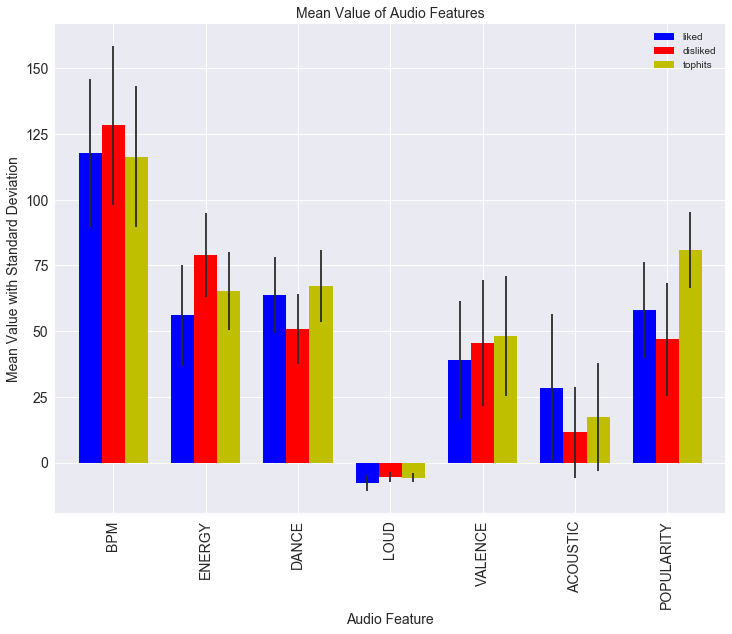

In [54]:
# GET DESCRIBE VALUES
d1 = liked.describe()
d2 = disliked.describe()
d3 = tophits.describe()

sns.set()

# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']
 
# SET WIDTH AND HEIGHT
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

# GROUPED BAR PLOTS
avgs = pd.concat([d1.iloc[1,:7].rename('liked'), 
                  d2.iloc[1,:7].rename('disliked'), 
                  d3.iloc[1,:7].rename('tophits')], axis=1).plot(kind='bar', 
                                                                 width=.75, 
                                                                 fontsize=14,
                                                                 yerr=[d1.iloc[2,:7], 
                                                                       d2.iloc[2,:7], 
                                                                       d3.iloc[2,:7]],
                                                                 color=['b','r','y'])

# SET TITLE AND LABELS 
avgs.set_title('Mean Value of Audio Features', fontsize=14)
avgs.set_xlabel('Audio Feature', fontsize=14)
avgs.set_ylabel('Mean Value with Standard Deviation', fontsize=14)

plt.show()

### 2. Liked vs. Disliked Songs
I seem to dislike songs that are high in energy, loud, non-acoustic, and have low danceability.

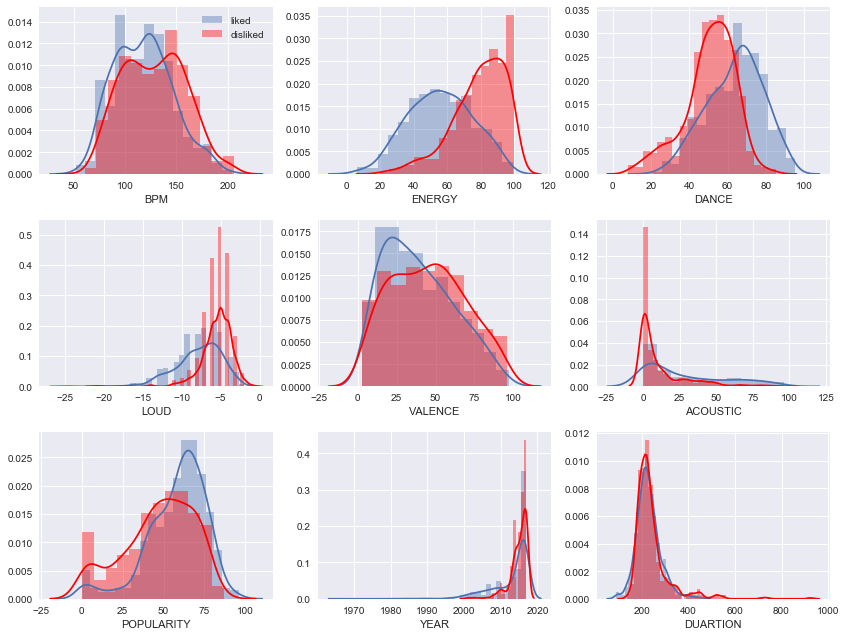

In [55]:
# USE SEABORN'S DISTRIBUTION PLOT
plt.subplot(331)
sns.distplot(liked.BPM, label='liked')
sns.distplot(disliked.BPM, color='r', label='disliked')
plt.xlabel('BPM')
plt.legend()

plt.subplot(332)
sns.distplot(liked.ENERGY)
sns.distplot(disliked.ENERGY, color='r')
plt.xlabel('ENERGY')

plt.subplot(333)
sns.distplot(liked.DANCE)
sns.distplot(disliked.DANCE, color='r')
plt.xlabel('DANCE')

plt.subplot(334)
sns.distplot(liked.LOUD)
sns.distplot(disliked.LOUD, color='r')
plt.xlabel('LOUD')

plt.subplot(335)
sns.distplot(liked.VALENCE)
sns.distplot(disliked.VALENCE, color='r')
plt.xlabel('VALENCE')

plt.subplot(336)
sns.distplot(liked.ACOUSTIC)
sns.distplot(disliked.ACOUSTIC, color='r')
plt.xlabel('ACOUSTIC')

plt.subplot(337)
sns.distplot(liked.POPULARITY)
sns.distplot(disliked.POPULARITY, color='r')
plt.xlabel('POPULARITY')

plt.subplot(338)
sns.distplot(liked.YEAR)
sns.distplot(disliked.YEAR, color='r')
plt.xlabel('YEAR')

plt.subplot(339)
sns.distplot(liked.DURATION)
sns.distplot(disliked.DURATION, color='r')
plt.xlabel('DUARTION')

plt.tight_layout()
plt.show()


In [56]:
liked.sort_values(['YEAR']).head()

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POPULARITY,YEAR,DURATION
85,Sunday Morning,The Velvet Underground,106.0,48.0,50.0,-12.0,51.0,8.0,4.0,1967,174
362,"No Woman, No Cry - Live At The Lyceum, London/...",Bob Marley & The Wailers,78.0,65.0,65.0,-9.0,62.0,27.0,38.0,1984,428
370,My Philosophy,Boogie Down Productions,94.0,84.0,88.0,-16.0,73.0,4.0,39.0,1988,338
574,Can I Kick It?,A Tribe Called Quest,97.0,55.0,87.0,-14.0,77.0,16.0,13.0,1990,252
42,Fake Plastic Trees,Radiohead,74.0,23.0,45.0,-13.0,13.0,17.0,70.0,1995,291


### 3. Liked vs. Today's Top Hits
*Energy*, *loudness*, and *valence* are relatively higher in today's top hits songs. And of course *popularity* is higher and *release year* is more recent for today's top hits. It's also interesting to note that *duration* is generally lower in today's top hits, probably because songs played on the radio are usually shorter.

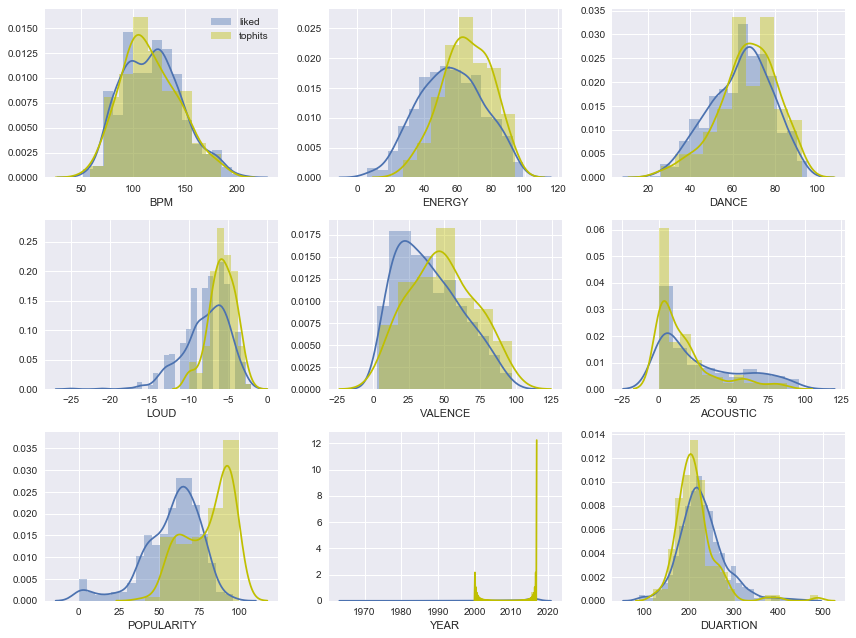

In [57]:
plt.subplot(331)
sns.distplot(liked.BPM, label='liked')
sns.distplot(tophits.BPM, color='y', label='tophits')
plt.xlabel('BPM')
plt.legend()

plt.subplot(332)
sns.distplot(liked.ENERGY)
sns.distplot(tophits.ENERGY, color='y')
plt.xlabel('ENERGY')

plt.subplot(333)
sns.distplot(liked.DANCE)
sns.distplot(tophits.DANCE, color='y')
plt.xlabel('DANCE')

plt.subplot(334)
sns.distplot(liked.LOUD)
sns.distplot(tophits.LOUD, color='y')
plt.xlabel('LOUD')

plt.subplot(335)
sns.distplot(liked.VALENCE)
sns.distplot(tophits.VALENCE, color='y')
plt.xlabel('VALENCE')

plt.subplot(336)
sns.distplot(liked.ACOUSTIC)
sns.distplot(tophits.ACOUSTIC, color='y')
plt.xlabel('ACOUSTIC')

plt.subplot(337)
sns.distplot(liked.POPULARITY)
sns.distplot(tophits.POPULARITY, color='y')
plt.xlabel('POPULARITY')

plt.subplot(338)
sns.distplot(liked.YEAR)
sns.distplot(tophits.YEAR, color='y')
plt.xlabel('YEAR')

plt.subplot(339)
sns.distplot(liked.DURATION)
sns.distplot(tophits.DURATION, color='y')
plt.xlabel('DUARTION')

plt.tight_layout()
plt.show()


<hr>
## PART III - Predictive Model